### Cross-Entropy Loss
This is a loss function which tells us how is our neural network fitting on the target function. The lower the value of the loss, the better it is. 
Let's find out what is the error function here.

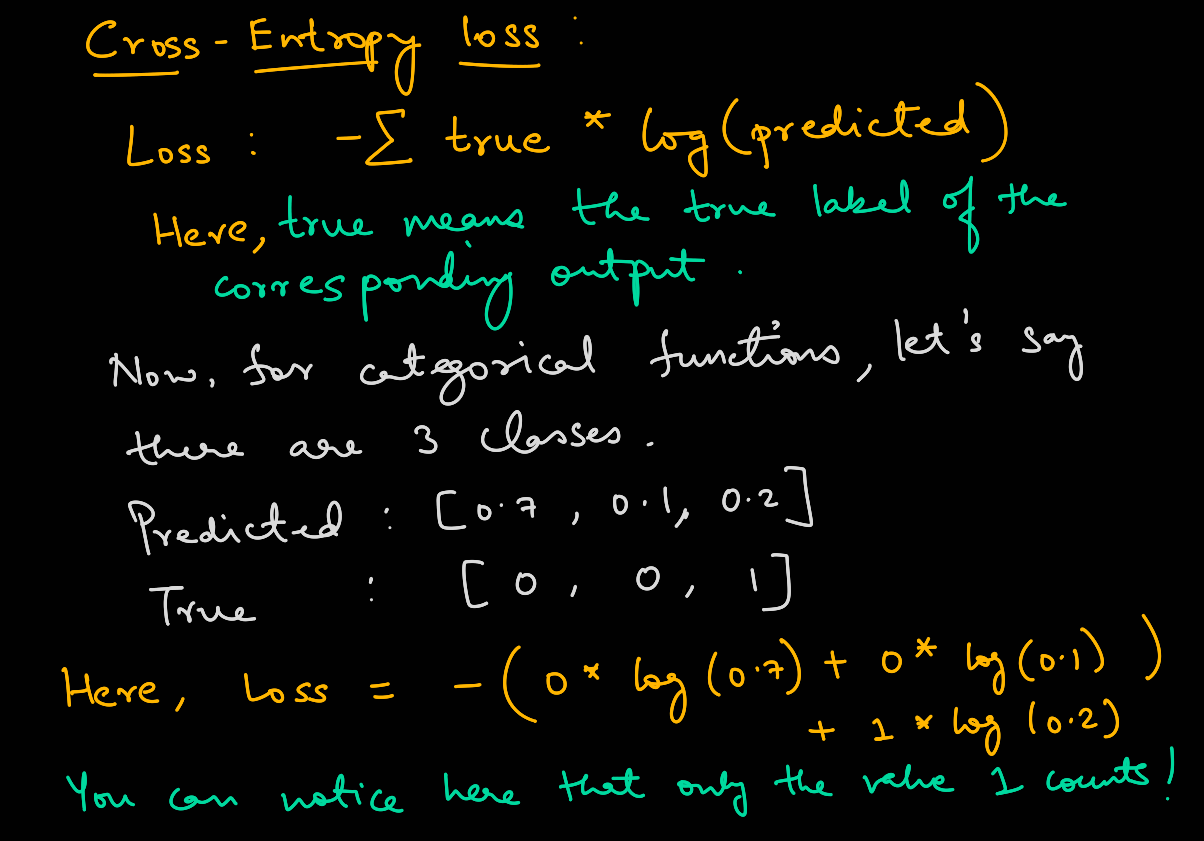

So, you can understand that only the log value corresponding to 1 counts here. Now, lets look at the graph of -log(x)

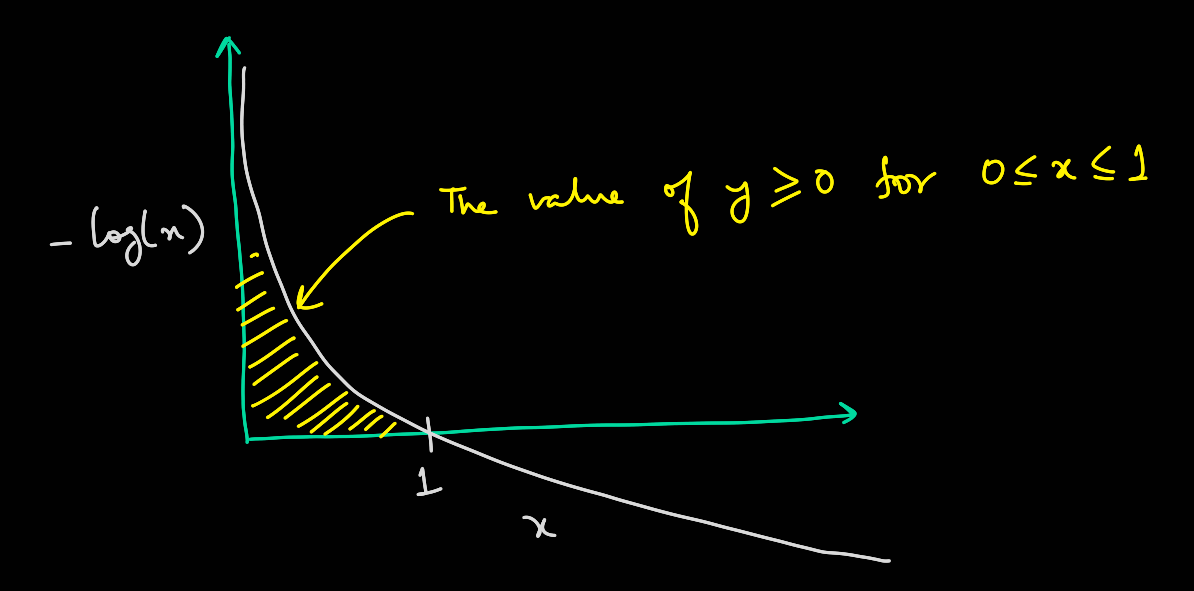

We will also clip the value of x so that it does not ever reach very close to zero, because of that the error might jump a lot immediately. Now once we have understood this, let's try to code this up!

In [26]:
import numpy as np
softmax_output = np.array([[0.1,0.2,0.7],[0.9,0.05,0.05],[0.1,0.1,0.8]])
y=np.array([0,1,2])

Now, the the true labels i.e. y can be defined in 2 ways. For a batch of lets say 10 inputs, it either can be a 1D array containing the true labels or it can be a one-hot encoded matrix. Depending on that we can do the implementation.

In [27]:
class Loss():
    def calculate_loss(self,y_pred,y):
        self.forward(y_pred,y)
        self.meanloss = np.mean(self.loss)
        
class CrossEntropyLoss(Loss):
    def forward(self,y_pred,y):
        y_pred = np.clip(y_pred,1e-7, 1-1e-7)
        if len(y.shape) == 1:
            self.errors = y_pred[[range(len(y_pred))],y]
        else:
            self.errors = y*y_pred
            self.errors = np.sum(self.errors,axis=1,keepdims=True)
        
        self.loss = -np.log(self.errors)
     

In [28]:
loss_f = CrossEntropyLoss()
loss_f.calculate_loss(softmax_output,y)
print(loss_f.meanloss, loss_f.loss)

1.8404869726207487 [[2.30258509 2.99573227 0.22314355]]


Can you guess why the third loss is the least?